In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from credit_decision_tree import DecisionTree

rand_seed = 41

In [2]:
train, test = train_test_split(
    pd.read_csv("data/cred_record_train_test.csv")
)
train.shape, test.shape

((583286, 21), (194429, 21))

In [3]:
train.STATUS.value_counts()

C    247116
0    218166
X    109326
1      6581
5      1129
2       613
3       203
4       152
Name: STATUS, dtype: int64

In [4]:
test.head()

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
513210,513210,5100075,-36,C,F,Y,Y,0,112500.0,Pensioner,...,Married,House / apartment,-21797,365243,1,0,0,0,NaN,2.0
532723,532723,5105565,-54,0,M,N,Y,0,135000.0,Pensioner,...,Civil marriage,House / apartment,-23094,365243,1,0,1,0,NaN,2.0
486463,486463,5095815,-43,C,F,N,N,3,112500.0,Working,...,Married,Municipal apartment,-15447,-2470,1,1,0,0,Sales staff,5.0
276554,276554,5054419,-32,X,M,N,N,0,225000.0,Commercial associate,...,Married,With parents,-13021,-5082,1,1,0,0,Managers,2.0
291376,291376,5061068,-5,0,M,Y,N,0,256500.0,Pensioner,...,Married,House / apartment,-21913,365243,1,0,1,0,NaN,2.0


In [5]:
predictors = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "FLAG_MOBIL",
    "FLAG_WORK_PHONE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
    "OCCUPATION_TYPE",
    "CNT_FAM_MEMBERS"
]

In [6]:
status_codes = {
    "C": 1,
    "X": 0,
    "0": -1,
    "1": -2,
    "2": -3,
    "3": -4,
    "4": -5,
    "5": -6
}
train["STATUS"].replace(status_codes, inplace=True)
test["STATUS"].replace(status_codes, inplace=True)

In [7]:
train_status_counts = train["STATUS"].value_counts()
train_status_counts

 1    247116
-1    218166
 0    109326
-2      6581
-6      1129
-3       613
-4       203
-5       152
Name: STATUS, dtype: int64

In [ ]:
train.to_pickle("data/tree_train.pkl")
test.to_pickle("data/tree_test.pkl")

In [8]:
import time

start = time.time()
cred_tree = DecisionTree(train_status_counts[-6], 0.8).fit(predictors, target="STATUS", data=train)
training_time = time.time() - start

print("\n", f"time to train: {training_time}", f"num nodes: {len(cred_tree.leaf_nodes_)}", sep="\n")

= 149 0.7670588235294118 425
= 150 0.5334928229665071 836
= 151 0.4626865671641791 469
= 152 0.5045180722891566 664
= 153 0.5894568690095847 626
= 154 0.5303867403314917 543
= 155 0.5414285714285715 700
= 156 0.5413333333333333 750
= 157 0.5613608748481167 823
= 158 0.3490725126475548 593
= 159 0.6041666666666666 1104
= 160 0.5 458
= 161 0.6439854191980559 823
= 162 0.5147058823529411 272
= 163 0.5860058309037901 343
= 164 0.6670403587443946 892
= 165 0.8664122137404581 262
= 166 0.5076923076923077 195
= 167 0.4860335195530726 358
= 168 0.47155255544840885 1037
= 169 0.7262569832402235 179
= 170 0.6717557251908397 131
= 171 0.6055555555555555 720
= 172 0.5250737463126843 1017
= 173 0.65625 384
= 174 0.5225806451612903 1085
= 175 0.4327354260089686 892
= 176 0.6374695863746959 822
= 177 0.5547169811320755 530
= 178 0.435361216730038 526
= 179 0.5873715124816447 681
= 180 0.4442211055276382 995
= 181 0.5361552028218695 567
= 182 0.61863173216885 687
= 183 0.6737864077669903 1030
= 184 0.

In [49]:
for i, leaf_node_df in enumerate(cred_tree.leaf_nodes_):
    leaf_node_df.to_pickle(f"leaf_node_pkls/node_{i}.pkl")

In [72]:
by_ID = test.groupby("ID")
test_by_ID = pd.DataFrame([
    group.iloc[0, :]
    for name, group in by_ID
])
test_by_ID

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
6,6,5008804,-6,1,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
20,20,5008805,-4,1,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
59,59,5008806,-28,-1,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
63,63,5008808,-2,-1,F,N,Y,0,270000.0,Commercial associate,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
66,66,5008809,-22,0,F,N,Y,0,270000.0,Commercial associate,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777640,777640,5150482,-17,-1,F,Y,Y,1,157500.0,Working,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
777666,777666,5150483,-14,0,F,Y,Y,1,157500.0,Working,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
777681,777681,5150484,-11,-1,F,Y,Y,1,157500.0,Working,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
777683,777683,5150485,0,-1,F,Y,Y,1,157500.0,Working,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


In [74]:
test_by_ID.set_index("ID", inplace=True)
test_by_ID

,Unnamed: 0,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,,,,
5008804,6,-6,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,20,-4,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,59,-28,-1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,63,-2,-1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,66,-22,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,777640,-17,-1,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
5150483,777666,-14,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
5150484,777681,-11,-1,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


In [75]:
cluster_preds = cred_tree.predict(test_by_ID)
cluster_preds

,0
ID,
5008804,735
5008805,735
5008806,238
5008808,463
5008809,463
...,...
5150482,755
5150483,755
5150484,755


In [125]:
cluster_preds.to_pickle("model_evaluation/cluster_preds.pkl")

In [84]:

def calculate_pmf(df):
    pmf = pd.Series(0, index=np.arange(-6, 2))
    counts = df["STATUS"].value_counts()
    pmf[counts.index] = counts / df.shape[0]
    return pmf

pred_pmfs = pd.DataFrame(
    [
        calculate_pmf(cred_tree.leaf_nodes_[clust])
        for clust in cluster_preds.loc[:, 0]
    ],
    index=cluster_preds.index
)
actual_pmfs = by_ID.apply(calculate_pmf)

In [85]:
pred_pmfs.shape, actual_pmfs.shape

((33718, 8), (33718, 8))

In [127]:
pred_pmfs.to_pickle("model_evaluation/pred_pmfs.pkl")
actual_pmfs.to_pickle("model_evaluation/actual_pmfs.pkl")

In [128]:
train.to_pickle("model_evaluation/train.pkl")
test.to_pickle("model_evaluation/test.pkl")

In [87]:
pred_pmfs.index.equals(actual_pmfs.index)

True

In [94]:
mean_abs_error = (pred_pmfs - actual_pmfs).abs().mean(axis=0)

In [95]:
mean_abs_error

-6    0.003201
-5    0.000530
-4    0.000692
-3    0.001946
-2    0.022934
-1    0.318632
 0    0.240531
 1    0.321158
dtype: float64

In [97]:
mean_guess = train["STATUS"].value_counts() / train.shape[0]
guess_abs_error = (mean_guess - actual_pmfs).abs().mean(axis=0)

In [98]:
guess_abs_error

-6    0.003345
-5    0.000532
-4    0.000691
-3    0.001950
-2    0.023193
-1    0.346195
 0    0.271116
 1    0.366605
dtype: float64

In [100]:
guess_abs_error - mean_abs_error

-6    0.000144
-5    0.000001
-4   -0.000001
-3    0.000003
-2    0.000260
-1    0.027563
 0    0.030585
 1    0.045446
dtype: float64

In [123]:
mean_abs_error / guess_abs_error

-6    0.957071
-5    0.997346
-4    1.001683
-3    0.998264
-2    0.988796
-1    0.920384
 0    0.887189
 1    0.876034
dtype: float64

In [124]:
1 - mean_abs_error / guess_abs_error

-6    0.042929
-5    0.002654
-4   -0.001683
-3    0.001736
-2    0.011204
-1    0.079616
 0    0.112811
 1    0.123966
dtype: float64

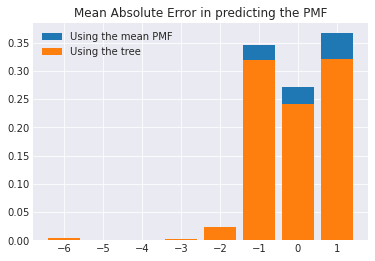

In [121]:
with plt.style.context("seaborn-darkgrid"):
    plt.title("Mean Absolute Error in predicting the PMF")
    plt.bar(guess_abs_error.index, guess_abs_error.values, label="Using the mean PMF")
    plt.bar(mean_abs_error.index, mean_abs_error.values, label="Using the tree")
    plt.legend()

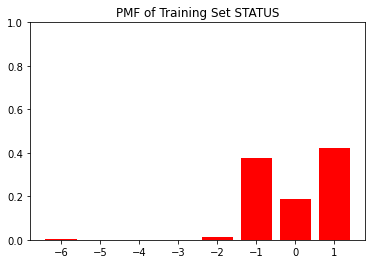

In [132]:
priors = train.STATUS.value_counts()/train.shape[0]
priors.sort_index(inplace=True)
plt.bar(priors.index, priors.values, color="red")
plt.ylim((0,1))
plt.title("PMF of Training Set STATUS")
plt.savefig("leaf_node_plots/full_training_set")